# Loading and preparing the data

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from torch.utils.data import DataLoader
from models.dataset import LCDataset

In [2]:
data = pd.read_pickle('data/clean_lc_data.pkl')
data.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mort_acc,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,loan_status_num
id,,,,,,,,,,,,,,,,,,,,,
1075358,3000,60 months,0.1269,67.79,B5,RENT,80000.00,Source Verified,Fully Paid,n,...,5.0,0.0,0.0,3.0,0.0,0.0,54644.0,17850.0,N,0
1071570,5375,60 months,0.1269,121.45,B5,RENT,15000.00,Verified,Charged Off,n,...,1.0,0.0,0.0,0.0,0.0,0.0,30612.0,21533.0,N,1
1069057,10000,36 months,0.1065,325.74,B2,RENT,100000.00,Source Verified,Charged Off,n,...,5.0,0.0,0.0,2.0,0.0,0.0,14358.0,17700.0,N,1
1069742,9200,36 months,0.0603,280.01,A1,RENT,77385.19,Not Verified,Fully Paid,n,...,3.0,0.0,0.0,2.0,0.0,0.0,42247.0,15142.0,N,0
1069559,6000,36 months,0.1171,198.46,B3,RENT,76000.00,Not Verified,Charged Off,n,...,3.0,0.0,0.0,0.0,0.0,0.0,43192.0,10350.0,N,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75856 entries, 1075358 to 129834559
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   75856 non-null  int64  
 1   term                        75856 non-null  object 
 2   int_rate                    75856 non-null  float64
 3   installment                 75856 non-null  float64
 4   sub_grade                   75856 non-null  object 
 5   home_ownership              75856 non-null  object 
 6   annual_inc                  75856 non-null  float64
 7   verification_status         75856 non-null  object 
 8   loan_status                 75856 non-null  object 
 9   pymnt_plan                  75856 non-null  object 
 10  purpose                     75856 non-null  object 
 11  zip_code                    75856 non-null  object 
 12  addr_state                  75856 non-null  object 
 13  dti                  

In [4]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,...,acc_now_delinq,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mort_acc,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,loan_status_num
count,75856.000000,75856.000000,75856.000000,7.585600e+04,75856.000000,75856.000000,75856.000000,75856.000000,75856.000000,75856.000000,...,75856.000000,75856.000000,75856.000000,75856.000000,75856.000000,75856.000000,75856.000000,7.585600e+04,75856.000000,75856.000000
mean,14076.631381,0.137041,429.721991,7.380120e+04,17.659481,0.254139,700.742130,0.698850,10.991787,0.135981,...,0.002531,4.248352,0.006605,8.525113,1.592122,0.106808,0.022754,4.595725e+04,21556.653910,0.194078
std,8743.619030,0.049015,261.464301,6.574256e+04,14.968522,0.766175,33.455595,0.963691,5.127483,0.415289,...,0.055484,2.883259,0.096589,484.235007,1.919198,0.317998,0.227927,4.396178e+04,20577.243366,0.395492
min,1000.000000,0.053100,7.610000,1.150000e+02,0.000000,0.000000,660.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,7400.000000,0.101600,240.040000,4.500000e+04,11.010000,0.000000,675.000000,0.000000,7.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.990300e+04,8300.000000,0.000000
50%,12000.000000,0.131100,370.220000,6.240000e+04,16.730000,0.000000,695.000000,0.000000,10.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.474300e+04,15500.000000,0.000000
75%,20000.000000,0.162900,563.820000,8.900000e+04,22.940000,0.000000,720.000000,1.000000,14.000000,0.000000,...,0.000000,6.000000,0.000000,0.000000,2.000000,0.000000,0.000000,5.715925e+04,27941.750000,0.000000
max,40000.000000,0.309900,1719.830000,7.200000e+06,999.000000,26.000000,845.000000,8.000000,55.000000,9.000000,...,5.000000,46.000000,8.000000,65000.000000,31.000000,5.000000,9.000000,1.276247e+06,367300.000000,1.000000


In [5]:
data.drop('loan_status', axis=1, inplace=True)

For the machine learning algorithms to be able to work on the data, the categorical columns have to be dealt with.

In [6]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'revol_util', 'initial_list_status', 'application_type', 'hardship_flag']


In [7]:
data['term']=data.term.map({' 36 months': 36, ' 60 months': 60})

In [8]:
data['revol_util']=data['revol_util'].str[:-1].astype(float)/100

In [9]:
data.corr()['loan_status_num'].drop('loan_status_num').sort_values()

C:\Users\Andras\AppData\Local\Temp\ipykernel_20700\838872069.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['loan_status_num'].drop('loan_status_num').sort_values()


last_fico_range_low          -0.517265
total_rec_prncp              -0.407134
last_pymnt_amnt              -0.327410
total_pymnt                  -0.277484
fico_range_low               -0.113195
mort_acc                     -0.069442
total_bc_limit               -0.047498
annual_inc                   -0.037358
total_acc                    -0.026645
revol_bal                    -0.012472
acc_now_delinq               -0.001960
delinq_amnt                  -0.000982
total_bal_ex_mort             0.000208
chargeoff_within_12_mths      0.007512
tax_liens                     0.016675
collections_12_mths_ex_med    0.019469
open_acc                      0.019730
delinq_2yrs                   0.020385
pub_rec_bankruptcies          0.030040
pub_rec                       0.034440
total_rec_int                 0.038422
revol_util                    0.039651
inq_last_6mths                0.047440
dti                           0.050001
installment                   0.067891
loan_amnt                

In [10]:
dummies = ['sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'initial_list_status', 'application_type', 'hardship_flag']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [11]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,...,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App,hardship_flag_Y
id,,,,,,,,,,,,,,,,,,,,,
1075358,3000,60,0.1269,67.79,80000.00,17.94,0.0,695,0.0,15.0,...,0,0,0,0,0,0,0,0,0,0
1071570,5375,60,0.1269,121.45,15000.00,18.08,0.0,725,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1069057,10000,36,0.1065,325.74,100000.00,7.06,0.0,720,2.0,14.0,...,0,0,0,0,0,0,0,0,0,0
1069742,9200,36,0.0603,280.01,77385.19,9.86,0.0,755,0.0,8.0,...,0,0,0,0,0,0,0,0,0,0
1069559,6000,36,0.1171,198.46,76000.00,2.40,0.0,690,1.0,7.0,...,0,0,0,0,0,0,0,0,0,0


# Preparing the data for the models

In [12]:
X = data.drop(columns=['loan_status_num','last_pymnt_amnt', 'total_rec_prncp', 'total_pymnt', 'total_rec_late_fee', 'out_prncp', 'out_prncp_inv'])
y = data['loan_status_num']
X_alt = data.drop(columns=['loan_status_num', 'total_pymnt', 'total_rec_late_fee', 'out_prncp', 'out_prncp_inv'])
X_alt_train, X_alt_temp, y_alt_train, y_alt_temp = train_test_split(X_alt, y, test_size=0.3, random_state=42)
X_train_extra, X_test_extra, y_train_extra, y_test_extra = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
#X = torch.tensor(X.values, dtype=torch.float32)
#y = torch.tensor(y.values, dtype=torch.float32).reshape(len(y),1)

In [13]:
# Split data into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp into validation (10%) and temp2 (20%)
X_validation, X_temp2, y_validation, y_temp2 = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Split temp2 into calibration (10%) and test (10%)
X_calibration, X_test, y_calibration, y_test = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)
X_calibration_scaled = scaler.transform(X_calibration)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_validation_tensor = torch.tensor(X_validation_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
X_calibration_tensor = torch.tensor(X_calibration_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(len(y_train),1)
y_validation_tensor = torch.tensor(y_validation.values, dtype=torch.float32).reshape(len(y_validation),1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(len(y_test),1)
y_calibration_tensor = torch.tensor(y_calibration.values, dtype=torch.float32).reshape(len(y_calibration),1)

In [14]:
print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_validation_tensor.shape)
print(y_validation_tensor.shape)
print(X_test_tensor.shape)
print(y_test_tensor.shape)

torch.Size([53099, 1001])
torch.Size([53099, 1])
torch.Size([7509, 1001])
torch.Size([7509, 1])
torch.Size([7624, 1001])
torch.Size([7624, 1])


In [17]:
from sklearn.tree import DecisionTreeClassifier, export_text
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
# Fit the model using X_train and y_train
dt_model.fit(X_train_extra, y_train_extra)
# Get the rules of the decision tree
tree_rules = export_text(dt_model, feature_names=list(X_train_extra.columns))
print(tree_rules)
# Use the trained model to make predictions
predictions_extra = dt_model.predict(X_test_extra)

class_report = classification_report(y_test_extra, predictions_extra)
print("Classification Report:\n", class_report)


|--- last_fico_range_low <= 652.50
|   |--- last_fico_range_low <= 602.50
|   |   |--- initial_list_status_w <= 0.50
|   |   |   |--- class: 1
|   |   |--- initial_list_status_w >  0.50
|   |   |   |--- class: 1
|   |--- last_fico_range_low >  602.50
|   |   |--- term <= 48.00
|   |   |   |--- class: 1
|   |   |--- term >  48.00
|   |   |   |--- class: 1
|--- last_fico_range_low >  652.50
|   |--- last_fico_range_low <= 682.50
|   |   |--- term <= 48.00
|   |   |   |--- class: 0
|   |   |--- term >  48.00
|   |   |   |--- class: 0
|   |--- last_fico_range_low >  682.50
|   |   |--- last_fico_range_low <= 727.50
|   |   |   |--- class: 0
|   |   |--- last_fico_range_low >  727.50
|   |   |   |--- class: 0

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88     18264
           1       0.54      0.88      0.67      4493

    accuracy                           0.83     22757
   macro avg       0.75      0.85      0.77

As there is a significant class imbalance in the dataset, the weights have to be calculated for the classification.

In [18]:
classlabels = torch.tensor(data['loan_status_num'].values, dtype=torch.long)
class_counts = torch.bincount(classlabels)

# Compute inverse class frequencies
class_weights_original = 1.0 / class_counts.float()

# Normalize class weights
class_weights_original /= class_weights_original.sum()
class_weights = class_weights_original[y_train_tensor.long()]


Preparing evaluation functions to see the models' results.

In [19]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();


# Setting up the baseline

In [20]:
from models.model import Logistic_Regression, MLP
from torchinfo import summary

In [21]:
#calculating number of features
n_features=len(data.drop(columns=['loan_status_num']).columns)-6
n_features

1001

In [22]:
lr_model = Logistic_Regression(num_features=n_features)
summary(lr_model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
Logistic_Regression                      [53099, 1]                --
├─Sequential: 1-1                        [53099, 1]                --
│    └─Linear: 2-1                       [53099, 1]                1,002
│    └─Sigmoid: 2-2                      [53099, 1]                --
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 53.21
Input size (MB): 212.61
Forward/backward pass size (MB): 0.42
Params size (MB): 0.00
Estimated Total Size (MB): 213.04

In [23]:
LEARNING_RATE = 0.01
EPOCHS = 1000

In [24]:
loss_function = nn.BCELoss(weight=class_weights)

In [25]:
optimizer = optim.Adam(lr_model.parameters(), lr=LEARNING_RATE)

In [26]:
def calculate_accuracy(preds, actuals):

    with torch.no_grad():
        rounded_preds = torch.round(preds)
        num_correct = torch.sum(rounded_preds == actuals)
        accuracy = num_correct/len(preds)

    return accuracy

In [27]:
train_losses = []
#test_losses  = []
train_accs = []
test_accs  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds = lr_model(X_train_tensor)
    train_loss  = loss_function(train_preds, y_train_tensor)

    # Predicting test data #b
    with torch.no_grad():
        test_preds = lr_model(X_validation_tensor)
        #test_loss  = loss_function(test_preds, y_test)

    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds, y_train_tensor)
    test_acc  = calculate_accuracy(test_preds, y_validation_tensor)

    # Backward propagation #d
    optimizer.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer.step()

    # Store training history #f
    train_losses.append(train_loss.item())
    #test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())

    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
              f' Train loss: {np.round(train_loss.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
              f' Train acc: {np.round(train_acc.item(),2)} \t|' \
              f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.227 	| Train acc: 0.51 	| Test acc: 0.52
Epoch: 100 	| Train loss: 0.147 	| Train acc: 0.81 	| Test acc: 0.8
Epoch: 200 	| Train loss: 0.133 	| Train acc: 0.84 	| Test acc: 0.83
Epoch: 300 	| Train loss: 0.126 	| Train acc: 0.85 	| Test acc: 0.85
Epoch: 400 	| Train loss: 0.123 	| Train acc: 0.86 	| Test acc: 0.85
Epoch: 500 	| Train loss: 0.121 	| Train acc: 0.86 	| Test acc: 0.85
Epoch: 600 	| Train loss: 0.121 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 700 	| Train loss: 0.12 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 800 	| Train loss: 0.12 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 900 	| Train loss: 0.121 	| Train acc: 0.86 	| Test acc: 0.86


In [28]:
evaluate_nn(y_train_tensor.clone().detach(), train_preds.clone().detach().round(), train=True)
evaluate_nn(y_validation_tensor.clone().detach(), test_preds.clone().detach().round(), train=False)

Train Result:
Accuracy Score: 86.05%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.962420      0.595635  0.860506      0.779028      0.891763
recall         0.860835      0.859126  0.860506      0.859981      0.860506
f1-score       0.908798      0.703518  0.860506      0.806158      0.869253
support    42870.000000  10229.000000  0.860506  53099.000000  53099.000000
_______________________________________________
Confusion Matrix: 
 [[36904  5966]
 [ 1441  8788]]

Test Result:
Accuracy Score: 85.74%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.954537     0.599318  0.857371     0.776928      0.884572
recall        0.863516     0.832319  0.857371     0.847917      0.857371
f1-score      0.906748     0.696858  0.857371     0.801803      0.865407
support    60

In [29]:
test_preds_lr = lr_model(X_test_tensor)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_lr.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 84.82%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.949955     0.582266  0.848242     0.766111      0.877420
recall        0.856046     0.816489  0.848242     0.836268      0.848242
f1-score      0.900559     0.679768  0.848242     0.790163      0.857003
support    6120.000000  1504.000000  0.848242  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5239  881]
 [ 276 1228]]


# Implementing semantic loss

In [30]:
from importlib import reload  # Python 3.4+
import models.loss
reload(models.loss)
from models.loss import semantic_loss

In [46]:
sl_model = Logistic_Regression(num_features=n_features)
summary(sl_model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
Logistic_Regression                      [53099, 1]                --
├─Sequential: 1-1                        [53099, 1]                --
│    └─Linear: 2-1                       [53099, 1]                1,002
│    └─Sigmoid: 2-2                      [53099, 1]                --
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 53.21
Input size (MB): 212.61
Forward/backward pass size (MB): 0.42
Params size (MB): 0.00
Estimated Total Size (MB): 213.04

In [47]:
optimizer_sl = optim.Adam(sl_model.parameters(), lr=LEARNING_RATE)

In [48]:
last_fico = torch.tensor(X_alt_train['last_fico_range_low'].values, dtype=torch.float32).reshape(len(y_train),1)
last_pymnt = torch.tensor(X_alt_train['last_pymnt_amnt'].values, dtype=torch.float32).reshape(len(y_train),1)
total_rec = torch.tensor(X_alt_train['total_rec_prncp'].values, dtype=torch.float32).reshape(len(y_train),1)
loan_amnt = torch.tensor(X_alt_train['loan_amnt'].values, dtype=torch.float32).reshape(len(y_train),1)

rule = torch.logical_or(
    torch.logical_and(last_fico <= 632.5, last_fico <= 572.5),
    torch.logical_and(last_fico > 632.5, last_fico > 662.5)).float()
rule = torch.logical_or(
    torch.logical_and(last_fico <= 632.5, last_pymnt <= 1388.98),
    torch.logical_and(last_fico > 632.5, total_rec <= 999.98)).float()
rule = torch.where(last_fico <= 632.5, torch.tensor(1), torch.tensor(0))
rule = torch.logical_or(torch.logical_and(last_fico<=632.5, last_fico<=572.5),torch.logical_and(last_fico<=632.5, torch.logical_and(last_fico>572.5, loan_amnt>12162.5))).float()
rule = (last_fico<=652.5).float()

In [49]:
print(rule)

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])


In [50]:
train_losses_sl = []
#test_losses  = []
train_accs_sl = []
test_accs_sl  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds = sl_model(X_train_tensor)
    #train_loss  = loss_function(train_preds, y_train_tensor)
    train_loss = semantic_loss(train_preds, y_train_tensor, rule, class_weights, 0.1)

    # Predicting test data #b
    with torch.no_grad():
        test_preds = sl_model(X_validation_tensor)
        #test_loss  = loss_function(test_preds, y_test)

    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds, y_train_tensor)
    test_acc  = calculate_accuracy(test_preds, y_validation_tensor)

    # Backward propagation #d
    optimizer_sl.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer_sl.step()

    # Store training history #f
    train_losses_sl.append(train_loss.item())
    #test_losses.append(test_loss.item())
    train_accs_sl.append(train_acc.item())
    test_accs_sl.append(test_acc.item())

    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
              f' Train loss: {np.round(train_loss.item(),3)} \t|' \
                  #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
              f' Train acc: {np.round(train_acc.item(),2)} \t|' \
              f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: -0.602 	| Train acc: 0.52 	| Test acc: 0.51
Epoch: 100 	| Train loss: -0.669 	| Train acc: 0.86 	| Test acc: 0.85
Epoch: 200 	| Train loss: -0.678 	| Train acc: 0.88 	| Test acc: 0.87
Epoch: 300 	| Train loss: -0.68 	| Train acc: 0.88 	| Test acc: 0.87
Epoch: 400 	| Train loss: -0.681 	| Train acc: 0.88 	| Test acc: 0.87
Epoch: 500 	| Train loss: -0.681 	| Train acc: 0.88 	| Test acc: 0.87
Epoch: 600 	| Train loss: -0.681 	| Train acc: 0.88 	| Test acc: 0.88
Epoch: 700 	| Train loss: -0.681 	| Train acc: 0.88 	| Test acc: 0.88
Epoch: 800 	| Train loss: -0.681 	| Train acc: 0.88 	| Test acc: 0.88
Epoch: 900 	| Train loss: -0.681 	| Train acc: 0.88 	| Test acc: 0.88


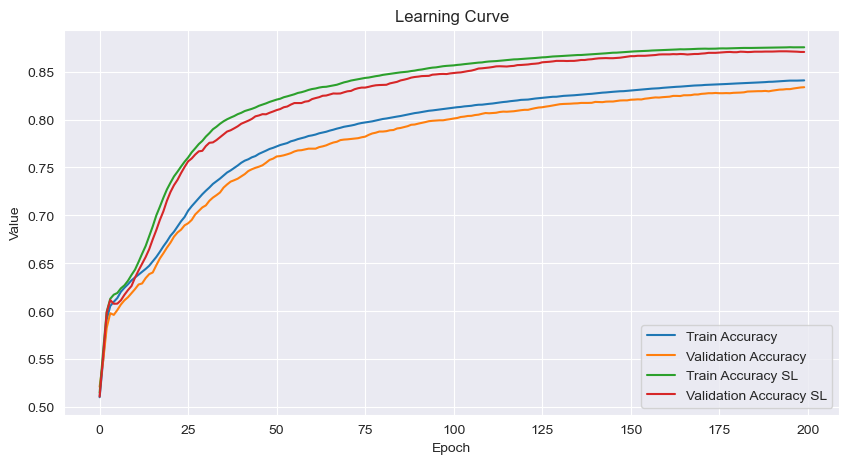

In [51]:
plt.figure(figsize=(10, 5))
#plt.plot(train_losses[:200], label='Train Loss')
plt.plot(train_accs[:200], label='Train Accuracy')
plt.plot(test_accs[:200], label='Validation Accuracy')
#plt.plot(train_losses_sl[:200], label='Train Loss SL')
plt.plot(train_accs_sl[:200], label='Train Accuracy SL')
plt.plot(test_accs_sl[:200], label='Validation Accuracy SL')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
evaluate_nn(y_train_tensor.clone().detach(), train_preds.clone().detach().round(), train=True)
evaluate_nn(y_validation_tensor.clone().detach(), test_preds.clone().detach().round(), train=False)

Train Result:
Accuracy Score: 87.92%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.946177      0.655885  0.879244      0.801031      0.890255
recall         0.901726      0.785023  0.879244      0.843375      0.879244
f1-score       0.923417      0.714667  0.879244      0.819042      0.883203
support    42870.000000  10229.000000  0.879244  53099.000000  53099.000000
_______________________________________________
Confusion Matrix: 
 [[38657  4213]
 [ 2199  8030]]

Test Result:
Accuracy Score: 87.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.938199     0.658824   0.87495     0.798511      0.883172
recall        0.903814     0.757268   0.87495     0.830541      0.874950
f1-score      0.920686     0.704624   0.87495     0.812655      0.878130
support    60

In [53]:
test_preds_sl = sl_model(X_test_tensor)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_sl.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 86.69%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.934468     0.639794  0.866868     0.787131      0.876337
recall        0.897059     0.744016  0.866868     0.820537      0.866868
f1-score      0.915381     0.687980  0.866868     0.801681      0.870522
support    6120.000000  1504.000000  0.866868  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5490  630]
 [ 385 1119]]


# Multilayer perceptrons

In [54]:
from importlib import reload  # Python 3.4+
import models.loss
reload(models.loss)
from models.loss import semantic_loss

In [55]:
from importlib import reload  # Python 3.4+
import models.model
reload(models.model)
from models.model import MLP

In [56]:
last_fico_index = X_alt_train.columns.get_loc('last_fico_range_low')
last_pymnt_index = X_alt_train.columns.get_loc('last_pymnt_amnt')
total_rec_index = X_alt_train.columns.get_loc('total_rec_prncp')
loan_amnt_index = X_alt_train.columns.get_loc('loan_amnt')

In [57]:
dataset = LCDataset(X_train_tensor, y_train_tensor)

data_loader = DataLoader(dataset, batch_size=5000, shuffle=True)

In [58]:
mlp_model = MLP(num_features=n_features)
summary(mlp_model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [53099, 1]                --
├─Sequential: 1-1                        [53099, 1]                --
│    └─Linear: 2-1                       [53099, 3]                3,006
│    └─ReLU: 2-2                         [53099, 3]                --
│    └─Linear: 2-3                       [53099, 1]                4
│    └─Sigmoid: 2-4                      [53099, 1]                --
Total params: 3,010
Trainable params: 3,010
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 159.83
Input size (MB): 212.61
Forward/backward pass size (MB): 1.70
Params size (MB): 0.01
Estimated Total Size (MB): 214.32

In [59]:
optimizer_mlp = optim.Adam(mlp_model.parameters())

In [60]:
train_losses_mlp = []
#test_losses  = []
train_accs_mlp = []
test_accs_mlp  = []

for epoch in range(200):
    # Forward propagation (predicting train data)
    for features, labels in data_loader:
        train_preds_mlp = mlp_model(features)
        class_weights_batch = class_weights_original[labels.long()]
        loss_function = nn.BCELoss(weight=class_weights_batch)

        train_loss_mlp  = loss_function(train_preds_mlp, labels)
    
        # Predicting test data #b
        with torch.no_grad():
            test_preds_mlp = mlp_model(X_validation_tensor)
            #test_loss  = loss_function(test_preds, y_test)
    
        # Calculate accuracy #c
        train_acc = calculate_accuracy(train_preds_mlp, labels)
        test_acc  = calculate_accuracy(test_preds_mlp, y_validation_tensor)
    
        # Backward propagation #d
        optimizer_mlp.zero_grad()
        train_loss_mlp.backward()
    
        # Gradient descent step #e
        optimizer_mlp.step()
    
        # Store training history #f
        train_losses_mlp.append(train_loss_mlp.item())
        #test_losses.append(test_loss.item())
        train_accs_mlp.append(train_acc.item())
        test_accs_mlp.append(test_acc.item())

    # Print training data #g
    #if epoch%100==0:
    print(f'Epoch: {epoch} \t|' \
          f' Train loss: {np.round(train_loss_mlp.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
          f' Train acc: {np.round(train_acc.item(),2)} \t|' \
          f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.218 	| Train acc: 0.63 	| Test acc: 0.64
Epoch: 1 	| Train loss: 0.217 	| Train acc: 0.61 	| Test acc: 0.63
Epoch: 2 	| Train loss: 0.206 	| Train acc: 0.63 	| Test acc: 0.63
Epoch: 3 	| Train loss: 0.199 	| Train acc: 0.65 	| Test acc: 0.64
Epoch: 4 	| Train loss: 0.191 	| Train acc: 0.67 	| Test acc: 0.65
Epoch: 5 	| Train loss: 0.197 	| Train acc: 0.67 	| Test acc: 0.66
Epoch: 6 	| Train loss: 0.188 	| Train acc: 0.69 	| Test acc: 0.67
Epoch: 7 	| Train loss: 0.185 	| Train acc: 0.69 	| Test acc: 0.68
Epoch: 8 	| Train loss: 0.185 	| Train acc: 0.69 	| Test acc: 0.68
Epoch: 9 	| Train loss: 0.184 	| Train acc: 0.7 	| Test acc: 0.69
Epoch: 10 	| Train loss: 0.181 	| Train acc: 0.69 	| Test acc: 0.68
Epoch: 11 	| Train loss: 0.187 	| Train acc: 0.69 	| Test acc: 0.69
Epoch: 12 	| Train loss: 0.177 	| Train acc: 0.7 	| Test acc: 0.69
Epoch: 13 	| Train loss: 0.18 	| Train acc: 0.71 	| Test acc: 0.7
Epoch: 14 	| Train loss: 0.177 	| Train acc: 0.71 	| Test acc:

In [61]:
evaluate_nn(y_validation_tensor.clone().detach(), test_preds_mlp.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 82.27%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.957368     0.531197  0.822746     0.744283      0.873428
recall        0.815589     0.851927  0.822746     0.833758      0.822746
f1-score      0.880810     0.654375  0.822746     0.767593      0.836210
support    6030.000000  1479.000000  0.822746  7509.000000   7509.000000
_______________________________________________
Confusion Matrix: 
 [[4918 1112]
 [ 219 1260]]


In [62]:
test_preds_mlp = mlp_model(X_test_tensor)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_mlp.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 80.95%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.952501     0.510543  0.809549     0.731522      0.865315
recall        0.802778     0.837101  0.809549     0.819939      0.809549
f1-score      0.871254     0.634257  0.809549     0.752755      0.824501
support    6120.000000  1504.000000  0.809549  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[4913 1207]
 [ 245 1259]]


In [66]:
mlpsl_model = MLP(num_features=n_features)
summary(mlpsl_model, input_size=X_train.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [53099, 1]                --
├─Sequential: 1-1                        [53099, 1]                --
│    └─Linear: 2-1                       [53099, 3]                3,006
│    └─ReLU: 2-2                         [53099, 3]                --
│    └─Linear: 2-3                       [53099, 1]                4
│    └─Sigmoid: 2-4                      [53099, 1]                --
Total params: 3,010
Trainable params: 3,010
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 159.83
Input size (MB): 212.61
Forward/backward pass size (MB): 1.70
Params size (MB): 0.01
Estimated Total Size (MB): 214.32

In [67]:
optimizer_mlpsl = optim.Adam(mlpsl_model.parameters())

In [70]:
train_losses_mlpsl = []
#test_losses  = []
train_accs_mlpsl = []
test_accs_mlpsl  = []

for epoch in range(400):
    # Forward propagation (predicting train data)
    for features, labels in data_loader:
        train_preds_mlpsl = mlpsl_model(features)
        class_weights_batch = class_weights_original[labels.long()]
        loss_function = nn.BCELoss(weight=class_weights_batch)
        last_fico_mlpsl = features[:, last_fico_index].reshape(-1, 1)

        rule_mlpsl = (last_fico_mlpsl<=652.5).float()
        #train_loss_mlp  = loss_function(train_preds_mlp, labels)
        train_loss_mlpsl = semantic_loss(train_preds_mlpsl, labels, rule_mlpsl, class_weights_batch, 0.005)

        # Predicting test data #b
        with torch.no_grad():
            test_preds_mlpsl = mlpsl_model(X_validation_tensor)
            #test_loss  = loss_function(test_preds, y_test)

        # Calculate accuracy #c
        train_acc = calculate_accuracy(train_preds_mlpsl, labels)
        test_acc  = calculate_accuracy(test_preds_mlpsl, y_validation_tensor)

        # Backward propagation #d
        optimizer_mlpsl.zero_grad()
        train_loss_mlpsl.backward()

        # Gradient descent step #e
        optimizer_mlpsl.step()

        # Store training history #f
        train_losses_mlpsl.append(train_loss_mlpsl.item())
        #test_losses.append(test_loss.item())
        train_accs_mlpsl.append(train_acc.item())
        test_accs_mlpsl.append(test_acc.item())

    # Print training data #g
    #if epoch%100==0:
    print(f'Epoch: {epoch} \t|' \
          f' Train loss: {np.round(train_loss_mlpsl.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
          f' Train acc: {np.round(train_acc.item(),2)} \t|' \
          f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.075 	| Train acc: 0.85 	| Test acc: 0.84
Epoch: 1 	| Train loss: 0.077 	| Train acc: 0.84 	| Test acc: 0.84
Epoch: 2 	| Train loss: 0.081 	| Train acc: 0.84 	| Test acc: 0.84
Epoch: 3 	| Train loss: 0.083 	| Train acc: 0.84 	| Test acc: 0.84
Epoch: 4 	| Train loss: 0.075 	| Train acc: 0.85 	| Test acc: 0.84
Epoch: 5 	| Train loss: 0.083 	| Train acc: 0.84 	| Test acc: 0.84
Epoch: 6 	| Train loss: 0.073 	| Train acc: 0.84 	| Test acc: 0.84
Epoch: 7 	| Train loss: 0.077 	| Train acc: 0.84 	| Test acc: 0.84
Epoch: 8 	| Train loss: 0.08 	| Train acc: 0.85 	| Test acc: 0.84
Epoch: 9 	| Train loss: 0.085 	| Train acc: 0.84 	| Test acc: 0.84
Epoch: 10 	| Train loss: 0.074 	| Train acc: 0.85 	| Test acc: 0.84
Epoch: 11 	| Train loss: 0.073 	| Train acc: 0.85 	| Test acc: 0.84
Epoch: 12 	| Train loss: 0.074 	| Train acc: 0.86 	| Test acc: 0.84
Epoch: 13 	| Train loss: 0.071 	| Train acc: 0.85 	| Test acc: 0.84
Epoch: 14 	| Train loss: 0.077 	| Train acc: 0.84 	| Test a

KeyboardInterrupt: 

In [71]:
evaluate_nn(y_validation_tensor.clone().detach(), test_preds_mlpsl.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 83.94%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.959779     0.560318  0.839393     0.760049      0.881100
recall        0.834992     0.857336  0.839393     0.846164      0.839393
f1-score      0.893047     0.677712  0.839393     0.785380      0.850634
support    6030.000000  1479.000000  0.839393  7509.000000   7509.000000
_______________________________________________
Confusion Matrix: 
 [[5035  995]
 [ 211 1268]]


In [72]:
test_preds_mlpsl = mlpsl_model(X_test_tensor)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_mlpsl.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 82.54%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.953934     0.536824   0.82542     0.745379       0.87165
recall        0.822222     0.838431   0.82542     0.830327       0.82542
f1-score      0.883194     0.654555   0.82542     0.768875       0.83809
support    6120.000000  1504.000000   0.82542  7624.000000    7624.00000
_______________________________________________
Confusion Matrix: 
 [[5032 1088]
 [ 243 1261]]


# Tree-based predictions

In [73]:
dt_model = DecisionTreeClassifier(class_weight='balanced')
# Fit the model using X_train and y_train
dt_model.fit(X_train_scaled, y_train)

predictions_dt = dt_model.predict(X_validation_scaled)

class_report = classification_report(y_validation, predictions_dt)
evaluate_nn(y_validation_tensor.clone().detach(), predictions_dt.round(), train=False)

Test Result:
Accuracy Score: 84.26%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.907669     0.595010  0.842589     0.751339      0.846086
recall        0.895025     0.628803  0.842589     0.761914      0.842589
f1-score      0.901303     0.611440  0.842589     0.756371      0.844210
support    6030.000000  1479.000000  0.842589  7509.000000   7509.000000
_______________________________________________
Confusion Matrix: 
 [[5397  633]
 [ 549  930]]


In [74]:
test_preds_dt = dt_model.predict(X_test_scaled)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_dt.round(), train=False)

Test Result:
Accuracy Score: 84.14%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.908094     0.591786  0.841422     0.749940      0.845695
recall        0.892810     0.632314  0.841422     0.762562      0.841422
f1-score      0.900387     0.611379  0.841422     0.755883      0.843374
support    6120.000000  1504.000000  0.841422  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5464  656]
 [ 553  951]]


In [168]:
import xgboost as xgb

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))

# Fit the model using X_train_scaled and y_train
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions_xgb = xgb_model.predict(X_validation_scaled)

# Evaluate the performance of the model
class_report_xgb = classification_report(y_validation, predictions_xgb)
print("XGBoost Classification Report:\n", class_report_xgb)
evaluate_nn(y_validation_tensor.clone().detach(), predictions_xgb.round(), train=False)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      6030
           1       0.63      0.85      0.72      1479

    accuracy                           0.87      7509
   macro avg       0.79      0.86      0.82      7509
weighted avg       0.89      0.87      0.88      7509

Test Result:
Accuracy Score: 87.04%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.959978     0.625746  0.870422     0.792862      0.894146
recall        0.875124     0.851251  0.870422     0.863188      0.870422
f1-score      0.915589     0.721283  0.870422     0.818436      0.877318
support    6030.000000  1479.000000  0.870422  7509.000000   7509.000000
_______________________________________________
Confusion Matrix: 
 [[5277  753]
 [ 220 1259]]


In [212]:
test_preds_xgb = xgb_model.predict(X_test_scaled)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_xgb.round(), train=False)

Test Result:
Accuracy Score: 86.59%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.959114     0.616313   0.86595     0.787713      0.891489
recall        0.870098     0.849069   0.86595     0.859584      0.865950
f1-score      0.912440     0.714206   0.86595     0.813323      0.873334
support    6120.000000  1504.000000   0.86595  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5325  795]
 [ 227 1277]]


# Comparing the models on limited data

In [75]:
X_train.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'open_acc',
       ...
       'addr_state_UT', 'addr_state_VA', 'addr_state_VT', 'addr_state_WA',
       'addr_state_WI', 'addr_state_WV', 'addr_state_WY',
       'initial_list_status_w', 'application_type_Joint App',
       'hardship_flag_Y'],
      dtype='object', length=1001)

In [76]:
X_train_alt = X_train[['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'last_fico_range_low']]
X_train_lim, X_remain, y_train_lim, y_remain = train_test_split(X_train_alt, y_train, test_size=0.995, random_state=42)
X_train_lim_scaled = scaler.fit_transform(X_train_lim)
X_validation_alt = X_validation[['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'last_fico_range_low']]
X_validation_lim_scaled = scaler.transform(X_validation_alt)
X_validation_tensor_lim = torch.tensor(X_validation_lim_scaled, dtype=torch.float32)
X_train_tensor_lim = torch.tensor(X_train_lim_scaled, dtype=torch.float32)
y_train_tensor_lim = torch.tensor(y_train_lim.values, dtype=torch.float32).reshape(len(y_train_lim),1)
X_train_tensor_lim.shape
y_train_tensor_lim.shape

torch.Size([265, 1])

In [77]:
X_test_alt = X_test[['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'last_fico_range_low']]
X_test_lim_scaled = scaler.transform(X_test_alt)
X_test_tensor_lim = torch.tensor(X_test_lim_scaled, dtype=torch.float32)

In [78]:
last_fico_index_lim = X_train_lim.columns.get_loc('last_fico_range_low')
loan_amnt_index_lim = X_train_lim.columns.get_loc('loan_amnt')

In [79]:
last_fico_lim = torch.tensor(X_train_lim['last_fico_range_low'].values, dtype=torch.float32).reshape(len(y_train_lim),1)
loan_amnt_lim = torch.tensor(X_train_lim['loan_amnt'].values, dtype=torch.float32).reshape(len(y_train_lim),1)
#last_pymnt_lim = torch.tensor(X_train_lim['last_pymnt_amnt'].values, dtype=torch.float32).reshape(len(y_train_lim),1)
#total_rec_lim = torch.tensor(X_train_lim['total_rec_prncp'].values, dtype=torch.float32).reshape(len(y_train_lim),1)

rule_lim = torch.logical_or(
    torch.logical_and(last_fico_lim <= 632.5, last_fico_lim <= 572.5),
    torch.logical_and(last_fico_lim > 632.5, last_fico_lim > 662.5)).float()
rule_lim = torch.where(last_fico_lim <= 632.5, torch.tensor(1), torch.tensor(0))
rule_lim = torch.logical_or(torch.logical_and(last_fico_lim<=632.5, last_fico_lim<=572.5),torch.logical_and(last_fico_lim<=632.5, torch.logical_and(last_fico_lim>572.5, loan_amnt_lim>12162.5))).float()
rule_lim = (last_fico_lim<=652.5).float()

In [100]:
small_model = Logistic_Regression(num_features=6)
optimizer_small = optim.Adam(small_model.parameters(), lr=LEARNING_RATE)
class_weights_lim = class_weights_original[y_train_tensor_lim.long()]
loss_function_lim=nn.BCELoss(weight=class_weights_lim)
train_losses = []
#test_losses  = []
train_accs = []
test_accs  = []

for epoch in range(EPOCHS):
    # Forward propagation (predicting train data) #a
    train_preds_lim = small_model(X_train_tensor_lim)
    #train_loss  = loss_function(train_preds, y_train_tensor)
    
    #print(torch.min(train_preds_lim), torch.max(train_preds_lim))
    train_loss = semantic_loss(train_preds_lim, y_train_tensor_lim, rule_lim, class_weights_lim, 0.025)
    #train_loss = loss_function_lim(train_preds_lim, y_train_tensor_lim)

    # Predicting test data #b
    with torch.no_grad():
        test_preds = small_model(X_validation_tensor_lim)
        #test_loss  = loss_function(test_preds, y_test)

    # Calculate accuracy #c
    train_acc = calculate_accuracy(train_preds_lim, y_train_tensor_lim)
    test_acc  = calculate_accuracy(test_preds, y_validation_tensor)

    # Backward propagation #d
    optimizer_small.zero_grad()
    train_loss.backward()

    # Gradient descent step #e
    optimizer_small.step()

    # Store training history #f
    train_losses.append(train_loss.item())
    #test_losses.append(test_loss.item())
    train_accs.append(train_acc.item())
    test_accs.append(test_acc.item())

    # Print training data #g
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
              f' Train loss: {np.round(train_loss.item(),3)} \t|' \
                  #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
              f' Train acc: {np.round(train_acc.item(),2)} \t|' \
              f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.193 	| Train acc: 0.63 	| Test acc: 0.59
Epoch: 100 	| Train loss: 0.086 	| Train acc: 0.76 	| Test acc: 0.77
Epoch: 200 	| Train loss: 0.07 	| Train acc: 0.82 	| Test acc: 0.83
Epoch: 300 	| Train loss: 0.064 	| Train acc: 0.86 	| Test acc: 0.85
Epoch: 400 	| Train loss: 0.061 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 500 	| Train loss: 0.061 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 600 	| Train loss: 0.06 	| Train acc: 0.86 	| Test acc: 0.86
Epoch: 700 	| Train loss: 0.06 	| Train acc: 0.87 	| Test acc: 0.86
Epoch: 800 	| Train loss: 0.06 	| Train acc: 0.87 	| Test acc: 0.86
Epoch: 900 	| Train loss: 0.06 	| Train acc: 0.86 	| Test acc: 0.86


In [101]:
evaluate_nn(y_train_tensor_lim.clone().detach(), train_preds_lim.clone().detach().round(), train=True)
evaluate_nn(y_validation_tensor.clone().detach(), test_preds.clone().detach().round(), train=False)

Train Result:
Accuracy Score: 86.42%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.954545   0.597015  0.864151    0.775780      0.888436
recall       0.875000   0.816327  0.864151    0.845663      0.864151
f1-score     0.913043   0.689655  0.864151    0.801349      0.871738
support    216.000000  49.000000  0.864151  265.000000    265.000000
_______________________________________________
Confusion Matrix: 
 [[189  27]
 [  9  40]]

Test Result:
Accuracy Score: 86.31%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.940938     0.622754  0.863098     0.781846      0.878267
recall        0.885075     0.773496  0.863098     0.829285      0.863098
f1-score      0.912152     0.689988  0.863098     0.801070      0.868394
support    6030.000000  1479.000000  0.863098  7509.0000

In [102]:
test_preds_lim = small_model(X_test_tensor_lim)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 86.06%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.942123     0.615748  0.860572     0.778935      0.877738
recall        0.880392     0.779920  0.860572     0.830156      0.860572
f1-score      0.910212     0.688178  0.860572     0.799195      0.866411
support    6120.000000  1504.000000  0.860572  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5388  732]
 [ 331 1173]]


In [103]:
dataset_lim = LCDataset(X_train_tensor_lim, y_train_tensor_lim)

data_loader_lim = DataLoader(dataset_lim, batch_size=300, shuffle=True)

In [104]:
mlp_model_lim = MLP(num_features=6)
summary(mlp_model_lim, input_size=X_train_lim.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [265, 1]                  --
├─Sequential: 1-1                        [265, 1]                  --
│    └─Linear: 2-1                       [265, 3]                  21
│    └─ReLU: 2-2                         [265, 3]                  --
│    └─Linear: 2-3                       [265, 1]                  4
│    └─Sigmoid: 2-4                      [265, 1]                  --
Total params: 25
Trainable params: 25
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.02

In [105]:
optimizer_mlp_lim = optim.Adam(mlp_model_lim.parameters())

In [106]:
train_losses_mlp_lim = []
#test_losses  = []
train_accs_mlp_lim = []
test_accs_mlp_lim  = []

for epoch in range(1000):
    # Forward propagation (predicting train data)
    for features, labels in data_loader_lim:
        train_preds_mlp_lim = mlp_model_lim(features)
        class_weights_batch = class_weights_original[labels.long()]
        loss_function = nn.BCELoss(weight=class_weights_batch)

        train_loss_mlp_lim  = loss_function(train_preds_mlp_lim, labels)

        # Predicting test data #b
        with torch.no_grad():
            test_preds_mlp_lim = mlp_model_lim(X_validation_tensor_lim)
            #test_loss  = loss_function(test_preds, y_test)

        # Calculate accuracy #c
        train_acc = calculate_accuracy(train_preds_mlp_lim, labels)
        test_acc  = calculate_accuracy(test_preds_mlp_lim, y_validation_tensor)

        # Backward propagation #d
        optimizer_mlp_lim.zero_grad()
        train_loss_mlp_lim.backward()

        # Gradient descent step #e
        optimizer_mlp_lim.step()

        # Store training history #f
        train_losses_mlp_lim.append(train_loss_mlp_lim.item())
        #test_losses.append(test_loss.item())
        train_accs_mlp_lim.append(train_acc.item())
        test_accs_mlp_lim.append(test_acc.item())

    # Print training data #g
    #if epoch%100==0:
    print(f'Epoch: {epoch} \t|' \
          f' Train loss: {np.round(train_loss_mlp_lim.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
          f' Train acc: {np.round(train_acc.item(),2)} \t|' \
          f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.227 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 1 	| Train loss: 0.227 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 2 	| Train loss: 0.226 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 3 	| Train loss: 0.226 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 4 	| Train loss: 0.226 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 5 	| Train loss: 0.226 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 6 	| Train loss: 0.225 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 7 	| Train loss: 0.225 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 8 	| Train loss: 0.225 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 9 	| Train loss: 0.225 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 10 	| Train loss: 0.224 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 11 	| Train loss: 0.224 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 12 	| Train loss: 0.224 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 13 	| Train loss: 0.224 	| Train acc: 0.81 	| Test acc: 0.79
Epoch: 14 	| Train loss: 0.223 	| Train acc: 0.81 	| Test 

In [107]:
evaluate_nn(y_validation_tensor.clone().detach(), test_preds_mlp_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 83.73%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.940939     0.562470  0.837262     0.751704      0.866394
recall        0.850746     0.782285  0.837262     0.816516      0.837262
f1-score      0.893573     0.654412  0.837262     0.773992      0.846467
support    6030.000000  1479.000000  0.837262  7509.000000   7509.000000
_______________________________________________
Confusion Matrix: 
 [[5130  900]
 [ 322 1157]]


In [108]:
test_preds_mlp_lim = mlp_model_lim(X_test_tensor_lim)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_mlp_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 83.30%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0          1.0  accuracy    macro avg  weighted avg
precision     0.93706     0.555556  0.833027     0.746308      0.861800
recall        0.84902     0.767952  0.833027     0.808486      0.833027
f1-score      0.89087     0.644711  0.833027     0.767791      0.842310
support    6120.00000  1504.000000  0.833027  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5196  924]
 [ 349 1155]]


In [114]:
mlpsl_model_lim = MLP(num_features=6)
summary(mlpsl_model_lim, input_size=X_train_lim.shape)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [265, 1]                  --
├─Sequential: 1-1                        [265, 1]                  --
│    └─Linear: 2-1                       [265, 3]                  21
│    └─ReLU: 2-2                         [265, 3]                  --
│    └─Linear: 2-3                       [265, 1]                  4
│    └─Sigmoid: 2-4                      [265, 1]                  --
Total params: 25
Trainable params: 25
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.02

In [115]:
optimizer_mlpsl_lim = optim.Adam(mlpsl_model_lim.parameters())

In [116]:
train_losses_mlpsl_lim = []
#test_losses  = []
train_accs_mlpsl_lim = []
test_accs_mlpsl_lim  = []

for epoch in range(1000):
    # Forward propagation (predicting train data)
    for features, labels in data_loader_lim:
        train_preds_mlpsl_lim = mlpsl_model_lim(features)
        class_weights_batch = class_weights_original[labels.long()]
        loss_function = nn.BCELoss(weight=class_weights_batch)
        last_fico_mlpsl_lim = features[:, last_fico_index_lim].reshape(-1, 1) 
        rule_mlpsl_lim = (last_fico_mlpsl_lim<=652.5).float()
        #train_loss_mlp  = loss_function(train_preds_mlp, labels)
        train_loss_mlpsl_lim = semantic_loss(train_preds_mlpsl_lim, labels, rule_mlpsl_lim, class_weights_batch, 0.025)

        # Predicting test data #b
        with torch.no_grad():
            test_preds_mlpsl_lim = mlpsl_model_lim(X_validation_tensor_lim)
            #test_loss  = loss_function(test_preds, y_test)

        # Calculate accuracy #c
        train_acc = calculate_accuracy(train_preds_mlpsl_lim, labels)
        test_acc  = calculate_accuracy(test_preds_mlpsl_lim, y_validation_tensor)

        # Backward propagation #d
        optimizer_mlpsl_lim.zero_grad()
        train_loss_mlpsl_lim.backward()

        # Gradient descent step #e
        optimizer_mlpsl_lim.step()

        # Store training history #f
        train_losses_mlpsl_lim.append(train_loss_mlpsl_lim.item())
        #test_losses.append(test_loss.item())
        train_accs_mlpsl_lim.append(train_acc.item())
        test_accs_mlpsl_lim.append(test_acc.item())

    # Print training data #g
    #if epoch%100==0:
    print(f'Epoch: {epoch} \t|' \
          f' Train loss: {np.round(train_loss_mlpsl_lim.item(),3)} \t|' \
              #f' Test loss: {np.round(test_loss.item(),3)} \t|' \
          f' Train acc: {np.round(train_acc.item(),2)} \t|' \
          f' Test acc: {np.round(test_acc.item(),2)}')

Epoch: 0 	| Train loss: 0.132 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 1 	| Train loss: 0.132 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 2 	| Train loss: 0.132 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 3 	| Train loss: 0.131 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 4 	| Train loss: 0.131 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 5 	| Train loss: 0.131 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 6 	| Train loss: 0.131 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 7 	| Train loss: 0.13 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 8 	| Train loss: 0.13 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 9 	| Train loss: 0.13 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 10 	| Train loss: 0.13 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 11 	| Train loss: 0.129 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 12 	| Train loss: 0.129 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 13 	| Train loss: 0.129 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 14 	| Train loss: 0.129 	| Train acc: 0.82 	| Test acc: 0.8
Epoch: 15

In [117]:
evaluate_nn(y_validation_tensor.clone().detach(), test_preds_mlpsl_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 87.14%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.936552     0.650088  0.871354     0.793320      0.880129
recall        0.900829     0.751183  0.871354     0.826006      0.871354
f1-score      0.918343     0.696989  0.871354     0.807666      0.874744
support    6030.000000  1479.000000  0.871354  7509.000000   7509.000000
_______________________________________________
Confusion Matrix: 
 [[5432  598]
 [ 368 1111]]


In [118]:
test_preds_mlpsl_lim = mlpsl_model_lim(X_test_tensor_lim)
evaluate_nn(y_test_tensor.clone().detach(), test_preds_mlpsl_lim.clone().detach().round(), train=False)

Test Result:
Accuracy Score: 87.29%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.937936     0.653471  0.872901     0.795703      0.881819
recall        0.901307     0.757314  0.872901     0.829311      0.872901
f1-score      0.919257     0.701571  0.872901     0.810414      0.876313
support    6120.000000  1504.000000  0.872901  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5516  604]
 [ 365 1139]]


In [119]:
dt_model_lim = DecisionTreeClassifier(class_weight='balanced')
# Fit the model using X_train and y_train
dt_model_lim.fit(X_train_lim_scaled, y_train_lim)

predictions_dt_lim = dt_model_lim.predict(X_test_lim_scaled)

evaluate_nn(y_test_tensor.clone().detach(), predictions_dt_lim.round(), train=False)

Test Result:
Accuracy Score: 83.47%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.883402     0.594868  0.834732     0.739135      0.826482
recall        0.914869     0.508644  0.834732     0.711756      0.834732
f1-score      0.898860     0.548387  0.834732     0.723624      0.829722
support    6120.000000  1504.000000  0.834732  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5599  521]
 [ 739  765]]


In [242]:
# Define the XGBoost classifier
xgb_model_lim = xgb.XGBClassifier(scale_pos_weight=(len(y_train_lim) - sum(y_train_lim)) / sum(y_train_lim))

# Fit the model using X_train_scaled and y_train
xgb_model_lim.fit(X_train_lim_scaled, y_train_lim)

# Make predictions on the test set
predictions_xgb_lim = xgb_model_lim.predict(X_test_lim_scaled)

evaluate_nn(y_test_tensor.clone().detach(), predictions_xgb_lim.round(), train=False)


Test Result:
Accuracy Score: 84.99%
_______________________________________________
CLASSIFICATION REPORT:
                   0.0          1.0  accuracy    macro avg  weighted avg
precision     0.909480     0.616279  0.849948     0.762879      0.851640
recall        0.902941     0.634309  0.849948     0.768625      0.849948
f1-score      0.906199     0.625164  0.849948     0.765681      0.850758
support    6120.000000  1504.000000  0.849948  7624.000000   7624.000000
_______________________________________________
Confusion Matrix: 
 [[5526  594]
 [ 550  954]]


# Creating conformal predictions

In [130]:
n = len(X_train)
#get the probability predictions
predictions = sl_model(X_calibration_tensor)
#get the probability for the true class
true_class_probs = torch.where(y_calibration_tensor == 1, predictions, 1 - predictions)
#Turn scores into uncertainty score
scores = 1-true_class_probs

In [131]:
#Setting the alpha value
alpha = 0.05

# define quantile
q_level = np.ceil((n+1)*(1-alpha))/n
qhat = np.quantile(scores.detach().numpy(), q_level, method='higher')

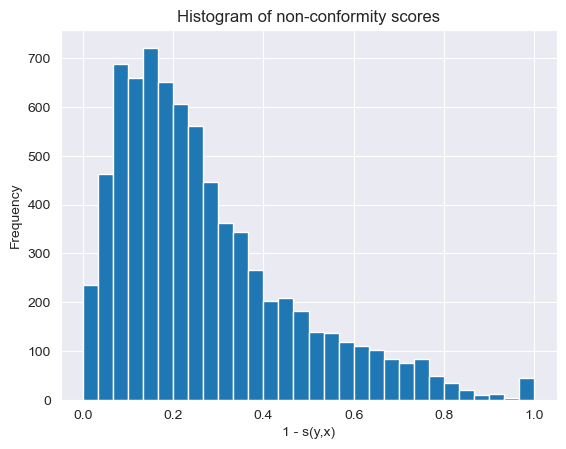

In [132]:
plt.hist(scores.detach().numpy(), bins=30, range=(0, 1))
plt.xlabel("1 - s(y,x)")
plt.ylabel("Frequency")
plt.title("Histogram of non-conformity scores")
plt.show()


In [133]:
prediction_sets = []

# Iterating through the probabilities tensor
for prob in test_preds_sl:
    prediction_set = []
    if prob < qhat:
        prediction_set.append("Charged Off")
    if 1 - prob < qhat:
        prediction_set.append("Fully Paid")
    prediction_sets.append(prediction_set)

print(prediction_sets)

[['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Fully Paid'], ['Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off', 'Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off'], ['Charged Off'], ['Charged Off'], ['Charged Off'], ['Fully Paid'], ['Charged Off'], ['Charged Off'], ['Charged Off'], ['Charged Off'], ['Charged Off'], ['Charged Off', 'Fully Paid'], ['Charged 

In [134]:
# Initialize counters for sets of length 1 and length 2
count_length_1 = 0
count_length_2 = 0

# Iterate through the prediction_sets list
for prediction_set in prediction_sets:
    if len(prediction_set) == 1:
        count_length_1 += 1
    elif len(prediction_set) == 2:
        count_length_2 += 1

print("Number of prediction sets of length 1:", count_length_1)
print("Number of prediction sets of length 2:", count_length_2)


Number of prediction sets of length 1: 5669
Number of prediction sets of length 2: 1955


# Comparing models

In [135]:
rounded_preds_lr = torch.round(test_preds_lr)
rounded_preds_sl = torch.round(test_preds_sl)

different_predictions = (rounded_preds_lr != rounded_preds_sl)

correct_predictions_lr = (rounded_preds_lr == y_test_tensor)
correct_predictions_sl = (rounded_preds_sl == y_test_tensor)

different_and_correct_lr = different_predictions & correct_predictions_lr
different_and_correct_sl = different_predictions & correct_predictions_sl

#indices where predictions are different and correct
indices_different_and_correct_lr = torch.nonzero(different_and_correct_lr).flatten()
indices_different_and_correct_sl = torch.nonzero(different_and_correct_sl).flatten()

In [136]:
only_sl_correct = torch.nonzero(different_and_correct_sl.float(), as_tuple=True)[0].tolist()
only_lr_correct = torch.nonzero(different_and_correct_lr.float(), as_tuple=True)[0].tolist()

In [161]:
rule_test = torch.tensor(X_test['last_fico_range_low'].values, dtype=torch.float32).reshape(len(y_test),1)<=652.5
rule_matched = torch.nonzero(rule_test.float(), as_tuple=True)[0].tolist()
len(rule_matched)

2500

In [149]:
intersection_sl = [value for value in only_sl_correct if value in rule_matched]
intersection_lr = [value for value in only_lr_correct if value in rule_matched]

In [151]:
X_test.iloc[intersection_sl].shape

(140, 1001)

In [160]:
correct_preds = torch.nonzero(y_test_tensor, as_tuple=True)[0].tolist()
intersect = [value for value in correct_preds if value in rule_matched]
X_test.iloc[intersect].shape

(1341, 1001)

In [162]:
torch.sum(y_test_tensor)

tensor(1504.)